   #                      COVID-19 DATA ANALYSIS

# Gathering Data

In [1]:
# import python libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
# Grab Worldwide covid-19 data website
page = requests.get("https://www.worldometers.info/coronavirus/")

#Check out whether the website can be accessible for scraping
page.status_code

200

In [3]:
# Parse Worldwide data from 
soup = BeautifulSoup(page.content, "lxml")
items = soup.find("tbody")


In [4]:

data = [item.text for item in items.find_all('td')]
data_chunksize = [data[i:i + 13] for i in range(0, len(data), 13)]
data_chunksize = data_chunksize[8:]
country = [i[0] for i in data_chunksize]
total_cases = [i[1] for i in data_chunksize]
new_cases = [i[2] for i in data_chunksize]

total_deaths = [i[3] for i in data_chunksize]
new_deaths = [i[4] for i in data_chunksize]
total_recovered = [i[5] for i in data_chunksize]

active_cases = [i[6] for i in data_chunksize]
critical = [i[7] for i in data_chunksize]
total_cases_per_1M = [i[8] for i in data_chunksize]

deaths_per_1M = [i[9] for i in data_chunksize]
total_tests = [i[10] for i in data_chunksize]
tests_per_1M = [i[11] for i in data_chunksize]
continent = [i[12] for i in data_chunksize]


In [5]:
worldwide = pd.DataFrame({"Country" : country,
                          "Continent" :continent,
                          "Total Cases" : total_cases,
                          "New Cases" : new_cases,
                          "Total Deaths" : total_deaths,
                          "New Deaths" : new_deaths,
                          "Total Recovered" : total_recovered,
                          "Active Cases" : active_cases, 
                          "Serious/Critical" : critical, 
                          "Total Cases/1M pop" : total_cases_per_1M,
                          "Deaths/1M pop" : deaths_per_1M,
                          "Total Tests" : total_tests, 
                          "Tests/1M pop" : tests_per_1M})

In [6]:
# Grab USA covid-19 data website
page_1 = requests.get("https://www.worldometers.info/coronavirus/country/us/")

# Parse USA data from HTML file
soup_1 = BeautifulSoup(page_1.content, "lxml")
items_1 = soup_1.find("tbody")

data_1 = [item_1.text.replace('\n', "").strip() for item_1 in items_1.find_all('td')]
data_chunksize_1 = [data_1[i:i + 11] for i in range(0, len(data_1), 11)]

usa_state = [i[0] for i in data_chunksize_1]
total_cases_1 = [i[1] for i in data_chunksize_1]
new_cases_1 = [i[2] for i in data_chunksize_1]

total_deaths_1 = [i[3] for i in data_chunksize_1]
new_deaths_1 = [i[4] for i in data_chunksize_1]
active_cases_1 = [i[5] for i in data_chunksize_1]

total_cases_per_1M_1 = [i[6] for i in data_chunksize_1]
deaths_per_1M_1 = [i[7] for i in data_chunksize_1]

total_tests_1 = [i[8] for i in data_chunksize_1]
tests_per_1M_1 = [i[9] for i in data_chunksize_1]


In [7]:
usa = pd.DataFrame({"USA State" : usa_state,
                  "Total Cases" : total_cases_1,
                  "New Cases" : new_cases_1,
                  "Total Deaths" : total_deaths_1,
                  "New Deaths" : new_deaths_1,
                  "Active Cases" : active_cases_1,  
                  "Total Cases/1M pop" : total_cases_per_1M_1,
                  "Deaths/1M pop" : deaths_per_1M_1,
                  "Total Tests" : total_tests_1, 
                  "Tests/1M pop" : tests_per_1M_1})

## Assessing Data

In [8]:
# Display the first 5 rows of the worldwide data
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,051,862","+16,097","60,747","+1,481","144,423","846,692","19,110","3,178",184,"6,063,440","18,318"
1,Spain,Europe,"236,899","+4,771","24,275",+453,"132,929","79,695","7,764","5,067",519,"1,414,477","30,253"
2,Italy,Europe,"203,591","+2,086","27,682",+323,"71,252","104,657","1,795","3,367",458,"1,910,761","31,603"
3,France,Europe,"167,518","+1,607","24,087",+427,"48,228","95,203","4,207","2,566",369,"463,662","7,103"
4,UK,Europe,"165,221","+4,076","26,097","+4,419",N/A,"138,780","1,559","2,434",384,"818,539","12,058"
5,Germany,Europe,"160,943","+1,031","6,376",+62,"120,400","34,167","2,409","1,921",76,"2,072,669","24,738"
6,Turkey,Asia,"117,589","+2,936","3,081",+89,"44,022","70,486","1,574","1,394",37,"991,613","11,757"
7,Russia,Europe,"99,399","+5,841",972,+105,"10,286","88,141","2,300",681,7,"3,303,717","22,638"
8,Iran,Asia,"93,657","+1,073","5,957",+80,"73,791","13,909","2,965","1,115",71,"453,386","5,398"
9,Brazil,South America,"74,493","+1,594","5,158",+95,"32,544","36,791","8,318",350,24,"339,552","1,597"


In [9]:

worldwide.tail()

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
207,Caribbean Netherlands,North America,5,,,,,5,,191,,110,"4,195"
208,Anguilla,North America,3,,,,3,0,,200,,,
209,Saint Pierre Miquelon,North America,1,,,,,1,,173,,,
210,Yemen,Asia,1,,,,1,0,,0.03,,120,4
211,China,Asia,"82,858",+22,"4,633",,"77,578",647,50,58,3,,


In [10]:
# Display the first 5 rows of the USA data
usa.head()

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA Total,"1,051,862","+16,097","60,747","+1,481","846,692","3,178",184,"6,063,440","18,318"
1,New York,"305,086","+3,636","23,474",+330,"234,649","15,551","1,197","872,481","44,472"
2,New Jersey,"116,264","+2,408","6,770",+328,"108,223","13,090",762,"240,246","27,049"
3,Massachusetts,"58,302",,"3,153",,"47,031","8,536",462,"254,500","37,261"
4,Illinois,"50,355","+2,253","2,215",+90,"47,534","3,927",173,"256,667","20,018"


In [11]:
# Number of countries and USA states affected by covid-19 respectively
print("The number worldwide countries in this dataset is {}".format(worldwide.shape[0]))
print("The number of USA States and territories in this dataset is {}".format(usa.shape[0]))

The number worldwide countries in this dataset is 212
The number of USA States and territories in this dataset is 52


In [12]:
# Show the brief summary of  worldwide data
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             212 non-null    object
 1   Continent           212 non-null    object
 2   Total Cases         212 non-null    object
 3   New Cases           212 non-null    object
 4   Total Deaths        212 non-null    object
 5   New Deaths          212 non-null    object
 6   Total Recovered     212 non-null    object
 7   Active Cases        212 non-null    object
 8   Serious/Critical    212 non-null    object
 9   Total Cases/1M pop  212 non-null    object
 10  Deaths/1M pop       212 non-null    object
 11  Total Tests         212 non-null    object
 12  Tests/1M pop        212 non-null    object
dtypes: object(13)
memory usage: 21.7+ KB


In [13]:
# Show the brief summary of  USA dataset
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   USA State           52 non-null     object
 1   Total Cases         52 non-null     object
 2   New Cases           52 non-null     object
 3   Total Deaths        52 non-null     object
 4   New Deaths          52 non-null     object
 5   Active Cases        52 non-null     object
 6   Total Cases/1M pop  52 non-null     object
 7   Deaths/1M pop       52 non-null     object
 8   Total Tests         52 non-null     object
 9   Tests/1M pop        52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


# Cleaning Worldwide Dataset

In [14]:
# Strip "+" from "New Cases" and "New Deaths" columns
worldwide["New Cases"] = worldwide["New Cases"].str.strip("+")
worldwide["New Deaths"] = worldwide["New Deaths"].str.strip("+")
worldwide.head(3)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,051,862","16,097","60,747","1,481","144,423","846,692","19,110","3,178",184,"6,063,440","18,318"
1,Spain,Europe,"236,899","4,771","24,275",453,"132,929","79,695","7,764","5,067",519,"1,414,477","30,253"
2,Italy,Europe,"203,591","2,086","27,682",323,"71,252","104,657","1,795","3,367",458,"1,910,761","31,603"


In [15]:
# Remove "," from column values and strip off white spaces
for col in worldwide.columns:
  worldwide[col]= worldwide[col].str.replace(",", "").str.strip()


In [16]:
# Replace empty cells with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("", 0, inplace=True)

In [17]:
worldwide["Total Recovered"].unique()

array(['144423', '132929', '71252', '48228', 'N/A', '120400', '44022',
       '10286', '73791', '32544', '19886', '11283', '7796', '9179',
       '22600', '1470', '1557', '2953', '1005', '9233', '11423', '7929',
       '1188', '3425', '12779', '8057', '1899', '2072', '3025', '1243',
       '3569', '2329', '8922', '1103', '1391', '6366', '1292', '1023',
       '32', '3096', '150', '5667', '1228', '484', '1268', '4087', '2073',
       '1335', '2800', '928', '1192', '1702', '1114', '3134', '1389',
       '819', '2665', '1370', '536', '577', '364', '1288', '1346', '1096',
       '252', '900', '915', '1656', '1267', '710', '188', '236', '255',
       '1229', '617', '243', '627', '230', '563', '269', '525', '599',
       '110', '830', '279', '315', '348', '148', '455', '423', '73',
       '437', '323', '645', '403', '136', '476', '394', '20', '69', '62',
       '386', '178', '59', '129', '167', '339', '235', '356', '311',
       '300', '29', '106', '71', '306', '142', '203', '9', '17', '222'

In [18]:
# Replace "N/A" with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("N/A", 0, inplace=True)

In [19]:
worldwide.isnull().sum()

Country               0
Continent             0
Total Cases           0
New Cases             0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious/Critical      0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Tests/1M pop          0
dtype: int64

In [20]:
# Change all datatpyes of worldwide dataset to int except "Country" column
worldwide = worldwide.astype({'New Cases' : int,
                              'Total Cases' : int, 
                              'Total Deaths' : int,
                              'New Deaths' : int,
                              'Total Recovered' : int,
                              'Active Cases' : int, 
                              'Serious/Critical' : int, 
                              'Total Cases/1M pop' : float,
                              'Deaths/1M pop' : float,
                              'Total Tests' : int, 
                              'Tests/1M pop' : float})


In [21]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             212 non-null    object 
 1   Continent           212 non-null    object 
 2   Total Cases         212 non-null    int32  
 3   New Cases           212 non-null    int32  
 4   Total Deaths        212 non-null    int32  
 5   New Deaths          212 non-null    int32  
 6   Total Recovered     212 non-null    int32  
 7   Active Cases        212 non-null    int32  
 8   Serious/Critical    212 non-null    int32  
 9   Total Cases/1M pop  212 non-null    float64
 10  Deaths/1M pop       212 non-null    float64
 11  Total Tests         212 non-null    int32  
 12  Tests/1M pop        212 non-null    float64
dtypes: float64(3), int32(8), object(2)
memory usage: 15.0+ KB


In [22]:
# Drop continent column with 0 values
zero_continent =worldwide[worldwide['Continent']== 0]
worldwide.drop([91, 197], inplace= True)

In [23]:
# Sort values by "Total Cases" column
worldwide.sort_values("Total Cases", ascending= False, inplace= True)

# reset index 
worldwide.reset_index(drop= True, inplace=True)

# Display the first 10 rows of dataset
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,1051862,16097,60747,1481,144423,846692,19110,3178.0,184.0,6063440,18318.0
1,Spain,Europe,236899,4771,24275,453,132929,79695,7764,5067.0,519.0,1414477,30253.0
2,Italy,Europe,203591,2086,27682,323,71252,104657,1795,3367.0,458.0,1910761,31603.0
3,France,Europe,167518,1607,24087,427,48228,95203,4207,2566.0,369.0,463662,7103.0
4,UK,Europe,165221,4076,26097,4419,0,138780,1559,2434.0,384.0,818539,12058.0
5,Germany,Europe,160943,1031,6376,62,120400,34167,2409,1921.0,76.0,2072669,24738.0
6,Turkey,Asia,117589,2936,3081,89,44022,70486,1574,1394.0,37.0,991613,11757.0
7,Russia,Europe,99399,5841,972,105,10286,88141,2300,681.0,7.0,3303717,22638.0
8,Iran,Asia,93657,1073,5957,80,73791,13909,2965,1115.0,71.0,453386,5398.0
9,China,Asia,82858,22,4633,0,77578,647,50,58.0,3.0,0,0.0


In [24]:
# Export data as csv file
worldwide.to_csv("worldwide_covid19.csv", index=False)

In [25]:
# Rename column headers and convert to lowercase
worldwide.columns = worldwide.columns.str.replace("/", " ")
worldwide.columns = worldwide.columns.str.replace(" ", "_").str.lower()

In [26]:
worldwide.set_index("country", inplace=True)

In [27]:
worldwide.head(3)

,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
country,,,,,,,,,,,,
USA,North America,1051862,16097,60747,1481,144423,846692,19110,3178.0,184.0,6063440,18318.0
Spain,Europe,236899,4771,24275,453,132929,79695,7764,5067.0,519.0,1414477,30253.0
Italy,Europe,203591,2086,27682,323,71252,104657,1795,3367.0,458.0,1910761,31603.0


# Cleaning USA Dataset

In [28]:
# Remove "USA Total" record from dataset
usa = usa[usa["USA State"] != "USA Total"]
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,"305,086","+3,636","23,474",+330,"234,649","15,551","1,197","872,481","44,472"
2,New Jersey,"116,264","+2,408","6,770",+328,"108,223","13,090",762,"240,246","27,049"
3,Massachusetts,"58,302",,"3,153",,"47,031","8,536",462,"254,500","37,261"
4,Illinois,"50,355","+2,253","2,215",+90,"47,534","3,927",173,"256,667","20,018"
5,California,"46,506",+343,"1,873",+11,"41,296","1,188",48,"577,608","14,754"
6,Pennsylvania,"45,016",,"2,195",+135,"42,056","3,519",172,"209,088","16,346"
7,Michigan,"39,262",,"3,567",,"27,353","3,943",358,"169,929","17,065"
8,Florida,"33,193",+347,"1,218",+47,"31,289","1,611",59,"375,300","18,220"
9,Louisiana,"27,660",+374,"1,845",+44,"8,512","5,931",396,"156,568","33,572"
10,Texas,"27,054",+883,732,+42,"14,536",970,26,"314,790","11,289"


In [29]:
# Strip "+" from "New Cases" and "New Deaths" columns
usa["New Cases"] = usa["New Cases"].str.strip("+")
usa["New Deaths"] = usa["New Deaths"].str.strip("+")



In [30]:
# Remove "," from column values and strip off white spaces
for col in usa.columns:
  usa[col]= usa[col].str.replace(",", "").str.strip()
usa.head(3) 

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,305086,3636,23474,330,234649,15551,1197,872481,44472
2,New Jersey,116264,2408,6770,328,108223,13090,762,240246,27049
3,Massachusetts,58302,,3153,,47031,8536,462,254500,37261


In [31]:
# Replace empty cells with zero(0)
for col in usa.columns:
  usa[col].replace("", 0, inplace = True)

In [32]:
usa["Tests/1M pop"].unique()

array(['44472', '27049', '37261', '20018', '14754', '16346', '17065',
       '18220', '33572', '11289', '25896', '13617', '18478', '11012',
       '13793', '10139', '12130', '25021', '11663', '24346', '56941',
       '12069', '9906', '13196', '16537', '22114', '12084', '10940',
       '16927', '22684', '12075', '11804', '33638', '28092', '9657',
       '15727', '12494', '15179', '29509', '12798', '19220', '15440',
       '16732', '23634', '13360', '33948', '24687', '21000', '14807',
       '12986', '25888'], dtype=object)

In [33]:
# Change all datatpyes of worldwide dataset to int except "USA State" column
usa = usa.astype({"Total Cases" : int,
              "New Cases" : int,
              "Total Deaths" : int,
              "New Deaths" : int,
              "Active Cases" : int,  
              "Total Cases/1M pop" : float,
              "Deaths/1M pop" : float,
              "Total Tests" : int, 
              "Tests/1M pop" : float})

In [34]:
# Check out the conversion of dtypes
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USA State           51 non-null     object 
 1   Total Cases         51 non-null     int32  
 2   New Cases           51 non-null     int32  
 3   Total Deaths        51 non-null     int32  
 4   New Deaths          51 non-null     int32  
 5   Active Cases        51 non-null     int32  
 6   Total Cases/1M pop  51 non-null     float64
 7   Deaths/1M pop       51 non-null     float64
 8   Total Tests         51 non-null     int32  
 9   Tests/1M pop        51 non-null     float64
dtypes: float64(3), int32(6), object(1)
memory usage: 3.2+ KB


In [35]:
# Sort values by "Total Cases" column
usa.sort_values("Total Cases", ascending= False, inplace=True)

# Display the first 10 rows of dataset
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,305086,3636,23474,330,234649,15551.0,1197.0,872481,44472.0
2,New Jersey,116264,2408,6770,328,108223,13090.0,762.0,240246,27049.0
3,Massachusetts,58302,0,3153,0,47031,8536.0,462.0,254500,37261.0
4,Illinois,50355,2253,2215,90,47534,3927.0,173.0,256667,20018.0
5,California,46506,343,1873,11,41296,1188.0,48.0,577608,14754.0
6,Pennsylvania,45016,0,2195,135,42056,3519.0,172.0,209088,16346.0
7,Michigan,39262,0,3567,0,27353,3943.0,358.0,169929,17065.0
8,Florida,33193,347,1218,47,31289,1611.0,59.0,375300,18220.0
9,Louisiana,27660,374,1845,44,8512,5931.0,396.0,156568,33572.0
10,Texas,27054,883,732,42,14536,970.0,26.0,314790,11289.0


In [36]:
# Export data as csv file
usa.to_csv("united_states_covid19.csv", index= False)

In [37]:
# Rename column headers and convert to lowercase
usa.columns = usa.columns.str.replace("/", " ")
usa.columns = usa.columns.str.replace(" ", "_").str.lower()

In [38]:
usa.head(2)

,usa_state,total_cases,new_cases,total_deaths,new_deaths,active_cases,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
1,New York,305086,3636,23474,330,234649,15551.0,1197.0,872481,44472.0
2,New Jersey,116264,2408,6770,328,108223,13090.0,762.0,240246,27049.0


# Analysis

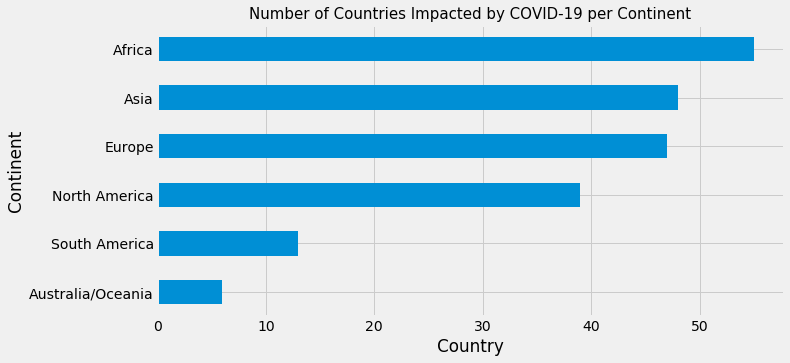

In [39]:
# Filter out the continent column
plt.figure(figsize= (10, 5))
worldwide['continent'].value_counts().sort_values()[1:].plot.barh()
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Number of Countries Impacted by COVID-19 per Continent', fontsize = 15);

### Which continent has the highest total cases, total deaths and total recovered?

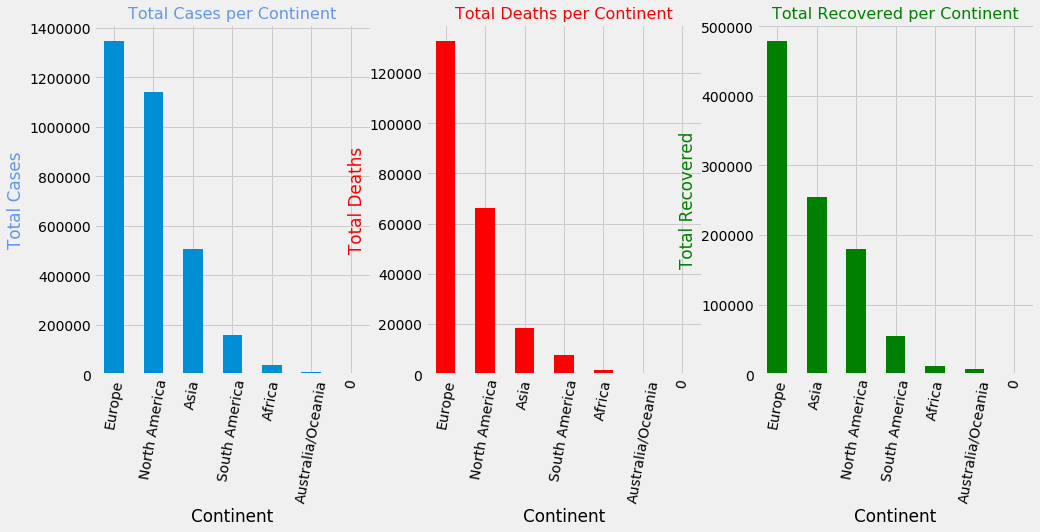

In [40]:

con =worldwide.groupby('continent').sum()
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
con.total_cases.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.xlabel('Continent')
plt.title('Total Cases per Continent', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
con.total_deaths.sort_values(ascending = False).plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.xlabel('Continent')
plt.title('Total Deaths per Continent', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
con.total_recovered.sort_values(ascending = False).plot.bar(color = 'g')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'g')
plt.xlabel('Continent')
plt.title('Total Recovered per Continent', fontsize= 16, color = 'g' );

### What are the top 10 countries in the world with the highest total cases, total deaths and total recovered?

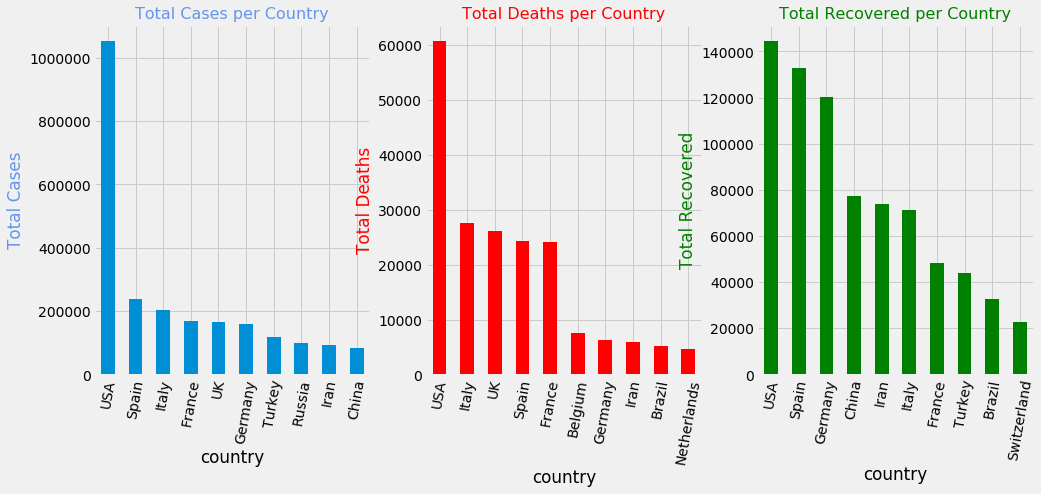

In [41]:
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
worldwide["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per Country', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
worldwide.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per Country', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
worldwide.total_recovered.sort_values(ascending = False)[:10].plot.bar(color = 'g')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'g')
plt.title('Total Recovered per Country', fontsize= 16, color = 'g' );

### What are the top 10  USA States with the highest total cases and total deaths ?

In [42]:
# set 'usa_state' column as an index
usa.set_index('usa_state', inplace= True)

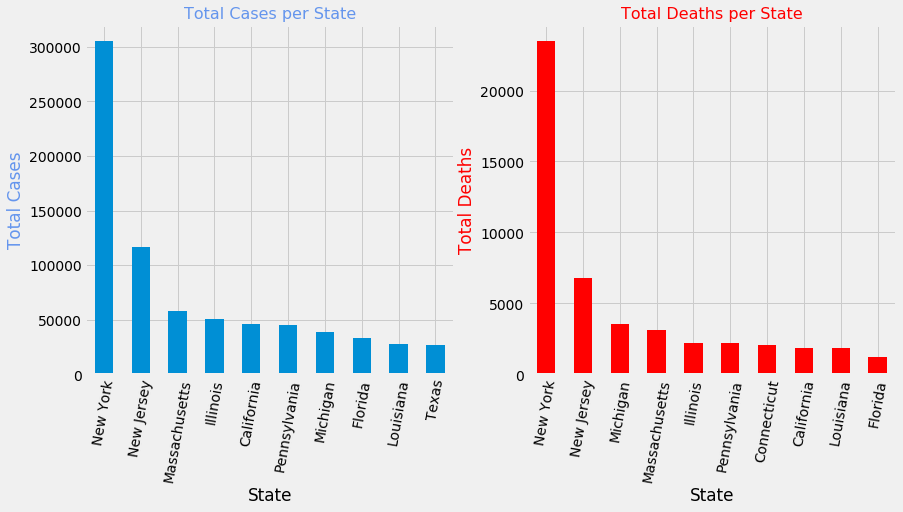

In [43]:
plt.figure(figsize= (20, 6))

# Total cases
plt.subplot(1,3, 1)
usa["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per State', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
usa.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per State', fontsize= 16, color = 'r');